In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
order = pd.read_csv('combined_order.csv')
order.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs


In [3]:
order = order.iloc[:, 1:]

In [4]:
order[order["order_id"]==2]

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
4304,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,fresh vegetables
4305,2,17794,6,1,Carrots,83,4,202279,prior,3,5,9,8.0,fresh vegetables
35308,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,spices seasonings
37232,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,oils vinegars
39528,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,baking ingredients
42503,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,202279,prior,3,5,9,8.0,doughs gelatins bake mixes
43492,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,202279,prior,3,5,9,8.0,spreads
46242,2,43668,9,0,Classic Blend Cole Slaw,123,4,202279,prior,3,5,9,8.0,packaged vegetables fruits


In [5]:
cust_prod = pd.crosstab(order['user_id'], order['aisle'])
cust_prod.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,4
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
36,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# orders aggregation of each user
summ = cust_prod.sum(axis = 1)
summ.values

array([11,  5,  9, ...,  4,  8, 16], dtype=int64)

In [7]:
(summ == 0).sum()

0

scale data

In [8]:
df = (cust_prod.T/summ.values).T

In [9]:
df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
13,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.000000,0.0,0.000000
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.444444
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.307692
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [10]:
df.shape

(25831, 134)

In [11]:
df_s = df.sample(10_000)

In [12]:
df_s

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
203294,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.000000
75566,0.0,0.0,0.0,0.0,0.0,0.0,0.029412,0.0,0.0,0.0,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.029412,0.0,0.058824
170482,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00,0.000000,0.0,0.0,0.5,0.0,0.0,0.000000,0.0,0.000000
74286,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00,0.166667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
79603,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.25,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186044,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
42015,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.000000
84604,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.000000


In [39]:
# usnig elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=100)
    kmeans.fit(df_s)
    # inertia method returns wcss for the model
    wcss.append(kmeans.inertia_)


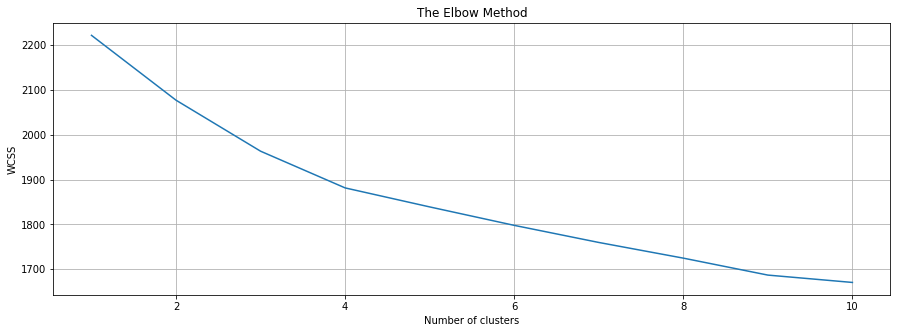

In [40]:
plt.figure(figsize=(15,5))
plt.plot(range(1,11), wcss)
# sns.lineplot(range=(1,11), marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid('True')
plt.show()

Clustering

In [33]:
data = df_s
km = KMeans(n_clusters = 4, random_state = 1, n_init = 10)


In [34]:
km

KMeans(n_clusters=4, random_state=1)